In [2]:
import pandas as pd

In [3]:
df_limpezas = pd.read_csv('/home/breno/projects/sobre-rodas/data/raw/V_LIMPEZAS_EXECUTADAS_202510141706.csv')  
df_limpezas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CD_MUNICIPIO   249 non-null    int64 
 1   DATA_EXECUCAO  249 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.0+ KB


In [4]:
df_municipios = pd.read_csv('/home/breno/projects/sobre-rodas/data/raw/ORGAO_EMPRESA_202510141615.csv')
df_municipios = df_municipios.rename(columns={'CD_ORGAO_EMPRESA': 'CD_MUNICIPIO', 'NM_ORGAO_EMPRESA': 'NM_MUNICIPIO'})
df_municipios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CD_MUNICIPIO  473 non-null    int64 
 1   NM_MUNICIPIO  473 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.5+ KB


In [5]:
df_merged = pd.merge(
    df_limpezas,
    df_municipios,
    on='CD_MUNICIPIO',  # Coluna comum para o join
    how='left'         # Usa todas as linhas de df_vistoria e adiciona as colunas de df_municipios
)
df_limpezas = df_merged
df_limpezas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CD_MUNICIPIO   249 non-null    int64 
 1   DATA_EXECUCAO  249 non-null    object
 2   NM_MUNICIPIO   249 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.0+ KB


In [6]:
# 1. Agrupa pelo nome do município e conta o número de registros (limpezas)
# O '.size()' conta o número de linhas em cada grupo.
# O '.reset_index(name='NUMERO_DE_LIMPEZAS')' transforma o resultado em um DataFrame
# e renomeia a coluna de contagem.
contagem_limpezas = df_limpezas.groupby('NM_MUNICIPIO').size().reset_index(name='NUMERO_DE_LIMPEZAS')

# 2. Opcional: Ordena o resultado para ver os municípios com mais limpezas primeiro
contagem_limpezas = contagem_limpezas.sort_values(
    by='NUMERO_DE_LIMPEZAS',
    ascending=False
)

# 3. Exibe o resultado (se desejar)
print(contagem_limpezas)

  NM_MUNICIPIO  NUMERO_DE_LIMPEZAS
0     DESCANSO                 249


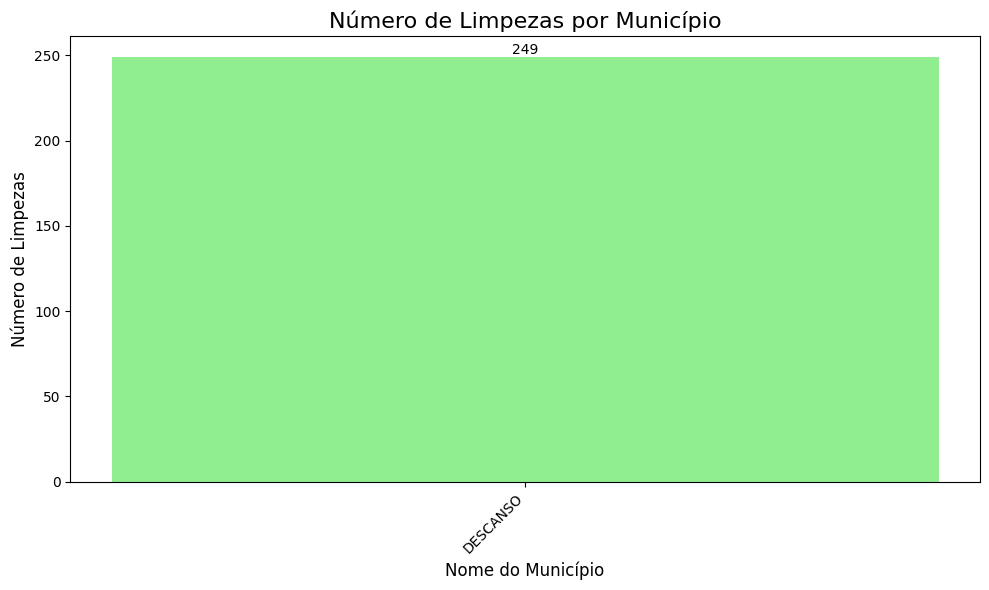

In [7]:
import matplotlib.pyplot as plt

# Supondo que 'contagem_limpezas' é o DataFrame resultante da etapa anterior
# com as colunas 'NM_MUNICIPIO' e 'NUMERO_DE_LIMPEZAS'.

# Se o seu DataFrame não tiver esses nomes de coluna, ajuste aqui:
x_col = 'NM_MUNICIPIO'
y_col = 'NUMERO_DE_LIMPEZAS'

plt.figure(figsize=(10, 6)) # Define o tamanho do gráfico

# 1. Cria o gráfico de barras
plt.bar(contagem_limpezas[x_col], contagem_limpezas[y_col], color='lightgreen')

# 2. Adiciona título e rótulos
plt.title('Número de Limpezas por Município', fontsize=16)
plt.xlabel('Nome do Município', fontsize=12)
plt.ylabel('Número de Limpezas', fontsize=12)

# 3. Rotaciona os nomes dos municípios no eixo X para melhor visualização (se houver muitos)
plt.xticks(rotation=45, ha='right')

# 4. Adiciona os valores em cima de cada barra (para clareza)
for i, v in enumerate(contagem_limpezas[y_col]):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)

# 5. Ajusta o layout para evitar que rótulos sejam cortados
plt.tight_layout()

# 6. Salva o gráfico (será salvo como 'limpezas_por_municipio.png')
plt.savefig('limpezas_por_municipio.png')

In [8]:
# 1. Garante que a coluna de data é do tipo datetime
# Se a sua coluna já for datetime, esta etapa é opcional, mas recomendada.
df_limpezas['DATA_EXECUCAO'] = pd.to_datetime(df_limpezas['DATA_EXECUCAO'])

# 2. Agrupa pela coluna de data e conta o número de registros (limpezas)
# O '.size()' conta o número de limpezas para cada data.
# O '.reset_index(name='QUANTIDADE_DE_LIMPEZAS')' transforma a Série resultante em um DataFrame.
contagem_por_dia = df_limpezas.groupby('DATA_EXECUCAO').size().reset_index(name='QUANTIDADE_DE_LIMPEZAS')

# 3. Opcional: Exibe o resultado
print(contagem_por_dia)

          DATA_EXECUCAO  QUANTIDADE_DE_LIMPEZAS
0   2024-11-05 08:40:01                       1
1   2024-11-05 09:04:44                       1
2   2024-11-05 09:37:53                       1
3   2024-11-05 10:04:55                       1
4   2024-11-05 10:19:15                       1
..                  ...                     ...
244 2025-10-07 08:25:41                       1
245 2025-10-07 08:46:22                       1
246 2025-10-07 08:58:43                       1
247 2025-10-07 09:30:58                       1
248 2025-10-07 11:14:32                       1

[249 rows x 2 columns]


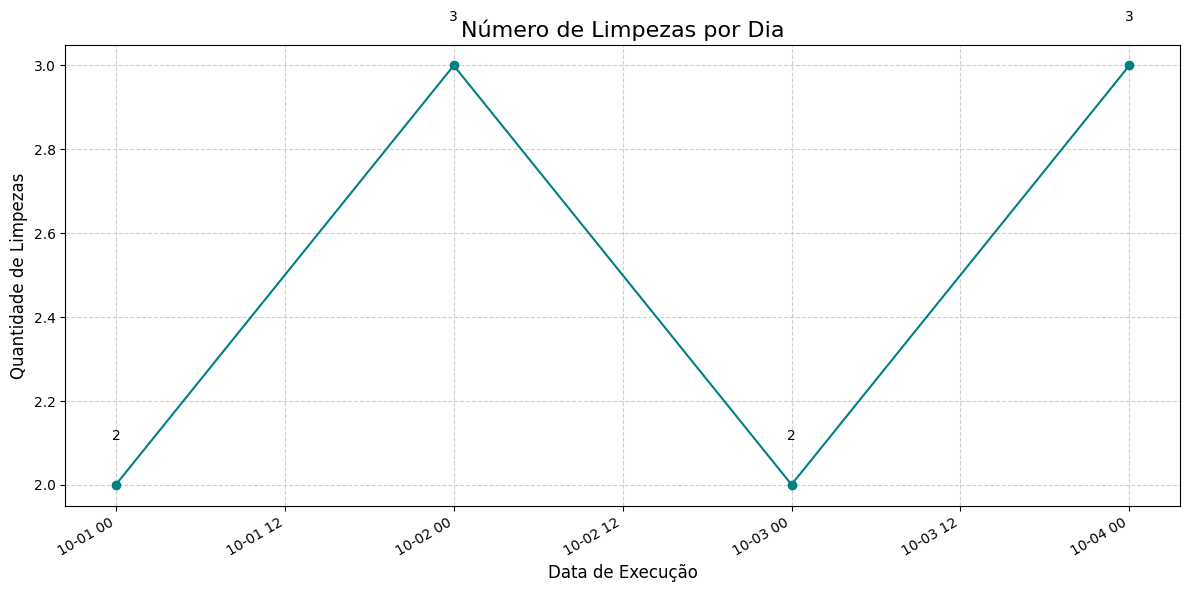

In [9]:
data_contagem = {
    'DATA_EXECUCAO': pd.to_datetime(['2023-10-01', '2023-10-02', '2023-10-03', '2023-10-04']),
    'QUANTIDADE_DE_LIMPEZAS': [2, 3, 2, 3]
}
contagem_por_dia = pd.DataFrame(data_contagem)

# 1. Definir as colunas
x_col = 'DATA_EXECUCAO'
y_col = 'QUANTIDADE_DE_LIMPEZAS'

# 2. Inicia a figura e os eixos
plt.figure(figsize=(12, 6))

# 3. Cria o gráfico de linha
# Marcadores para cada ponto e uma grade para melhor leitura
plt.plot(contagem_por_dia[x_col], contagem_por_dia[y_col], marker='o', linestyle='-', color='teal')

# 4. Adiciona título e rótulos
plt.title('Número de Limpezas por Dia', fontsize=16)
plt.xlabel('Data de Execução', fontsize=12)
plt.ylabel('Quantidade de Limpezas', fontsize=12)

# 5. Formata o eixo X para datas
plt.gcf().autofmt_xdate() # Ajusta automaticamente o formato das datas para evitar sobreposição

# 6. Adiciona uma grade (opcional, mas ajuda na leitura)
plt.grid(True, linestyle='--', alpha=0.6)

# 7. Adiciona os valores nos pontos (para clareza)
for i, (x_val, y_val) in enumerate(zip(contagem_por_dia[x_col], contagem_por_dia[y_col])):
    plt.text(x_val, y_val + 0.1, str(y_val), ha='center', va='bottom', fontsize=10)

# 8. Ajusta o layout e exibe/salva o gráfico
plt.tight_layout()

# Salva o gráfico
plt.savefig('limpezas_por_dia_linear.png')